In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#functions
def f1(x):
    x = np.array(x)
    return x*np.sin(x) + 2*x

def f2(x):
    x = np.array(x)
    return 10*np.sin(x) + x**2

def f3(x):
    x = np.array(x)
    return np.sign(x)*(x**2 + 300) + 20*np.sin(x)

In [15]:
# X should be X_test, y = y_test
def print_r2_score(reg, X, y):
    print("R2:", r2_score(y, reg.predict(X.reshape(-1, 1))))

In [16]:
# X should be X_test, y = y_test
def plotTestAndReg(reg, X, y):
    plt.plot(X, y)
    plt.scatter(X, y, s = 5, c = 'grey')
    plt.plot(X, reg.predict(X.reshape(-1, 1)))
    plt.show()

In [17]:
def crossPolinomial(X_train, X_test, y_train, y_test):
    reg = make_pipeline(PolynomialFeatures(), Lasso(tol=0.4))
    param_grid = {'polynomialfeatures__degree':list(range(2,20,2)), 
              'lasso__alpha':[1e-2, 0.1, 1]}
    gridsearch = GridSearchCV(reg, param_grid, scoring='r2', cv=5)
    res = gridsearch.fit(X_train.reshape(-1,1), y_train)
    
    final_model = res.best_estimator_
    final_model.fit(X_train.reshape(-1,1), y_train)
    plotTestAndReg(final_model, X = X_test, y = y_test)
    print_r2_score(final_model, X = X_test, y = y_test)

## Function 1

**Data Creation**

In [3]:
from sklearn.model_selection import train_test_split

tr = 20
n_samples = 100
X = np.linspace(-tr, tr, n_samples)
y = f1(X)
X_train, X_test, y_train, y_test = train_test_split(
            X, y, train_size=0.7, random_state=42, shuffle=True)
y_test = y_test[X_test.argsort()]
X_test.sort()
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

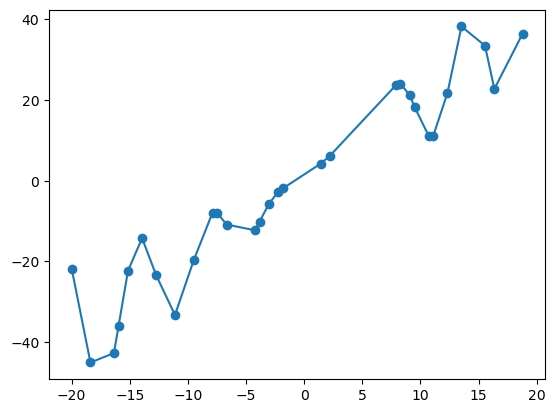

In [4]:
plt.plot(X_test, y_test)
plt.scatter(X_test, y_test)
plt.show()

**Regression**

In [5]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [6]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(fit_intercept = True)
X_train = X_train.reshape(-1, 1)
reg.fit(X_train, y_train)
y_test_pred = reg.predict(X_test.reshape(-1,1))

In [7]:
r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
print (r2, mae, mse)

0.891991685511165 5.965426899613283 57.420302682000056


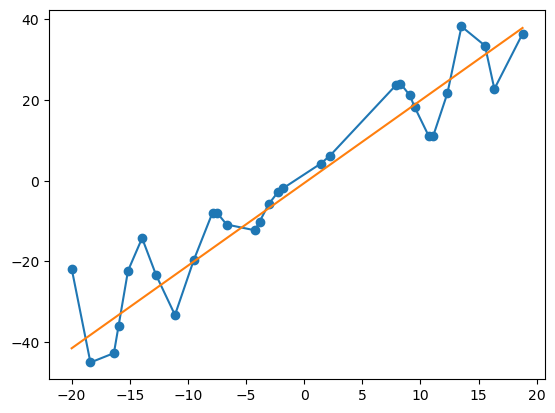

In [8]:
plt.plot(X_test, y_test)
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred)
plt.show()

**Cross_val_score**

In [9]:
from sklearn.model_selection import cross_val_score

reg = LinearRegression()

r2 = cross_val_score(reg, X_train, y_train, cv=5, scoring='r2')

In [10]:
print(r2)

[0.87793274 0.86539357 0.88377977 0.81974556 0.86187895]


#### Polynomial regression

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline

reg = make_pipeline(PolynomialFeatures(15), Lasso(alpha=0.5, tol=0.2))
reg.fit(X_train, y_train)
plotTestAndReg(reg)
print_r2_score(reg)

TypeError: plotTestAndReg() missing 2 required positional arguments: 'X' and 'y'

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(5)
X_poly = poly.fit_transform(X_train)

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

regR = Ridge(alpha = 0.5)
regL = Lasso(alpha = 0.5)

regR.fit(X_poly, y_train)
regL.fit(X_poly, y_train)

y_test_predR = regR.predict(X_test)
y_test_predL = regL.predict(X_test)

print("ridge", r2_score(y_test, y_test_predR))
print("lasso", r2_score(y_test, y_test_predL))

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

regR = Ridge(alpha = 0.5)
regL = Lasso(alpha = 0.5)

regR.fit(X_train, y_train)
regL.fit(X_train, y_train)

y_test_predR = regR.predict(X_test.reshape(-1,1))
y_test_predL = regL.predict(X_test.reshape(-1,1))

print("ridge", r2_score(y_test, y_test_predR))
print("lasso", r2_score(y_test, y_test_predL))

In [ ]:
plotTestAndReg(y_test_predR)

In [ ]:
plotTestAndReg(y_test_predL)

In [ ]:
#polinomial regression, cross validation
from sklearn.model_selection import GridSearchCV

param_grid = {'polynomialfeatures__degree':list(range(2,20,2)), 
              'lasso__alpha':[1e-2, 0.1, 1]}

gridsearch = GridSearchCV(reg, param_grid, scoring='r2', cv=5)
res = gridsearch.fit(X_train.reshape(-1,1), y_train)

# Print result
print("Best model configuration is:")
print(res.best_params_)
print("with R2=%.2f" % res.best_score_)

In [ ]:
final_model = res.best_estimator_
final_model.fit(X_train, y_train)
plotTestAndReg(final_model)
print_r2_score(final_model)

## Function 2

In [ ]:
tr = 20
n_samples = 100
X = np.linspace(-tr, tr, n_samples)
y = f2(X)
X_train, X_test, y_train, y_test = train_test_split(
            X, y, train_size=0.7, random_state=42, shuffle=True)
y_test = y_test[X_test.argsort()]
X_test.sort()

In [ ]:
plt.plot(X_test, y_test)
plt.scatter(X_test, y_test)
plt.show()

In [ ]:
crossPolinomial(X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test)

## Function 3

In [ ]:
tr = 20
n_samples = 100
X = np.linspace(-tr, tr, n_samples)
y = f3(X)
X_train, X_test, y_train, y_test = train_test_split(
            X, y, train_size=0.7, random_state=42, shuffle=True)
y_test = y_test[X_test.argsort()]
X_test.sort()

In [ ]:
plt.plot(X_test, y_test)
plt.scatter(X_test, y_test)
plt.show()

In [ ]:
crossPolinomial(X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test)

**Try with randomForestRegressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
reg = make_pipeline(PolynomialFeatures(), RandomForestRegressor())
param_grid = {'polynomialfeatures__degree':list(range(2,20,2)), 
          'randomforestregressor__n_estimators':list(range(10, 101, 10)),
              "randomforestregressor__min_impurity_decrease": [0, .01, .03, .07, .09, .11]}

gridsearch = GridSearchCV(reg, param_grid, scoring='r2', cv=5)
res = gridsearch.fit(X_train.reshape(-1,1), y_train)

final_model = res.best_estimator_
final_model.fit(X_train.reshape(-1,1), y_train)
plotTestAndReg(final_model, X = X_test, y = y_test)
print_r2_score(final_model, X = X_test, y = y_test)

In [ ]:
res.best_params_

In [19]:
from sklearn.datasets import make_regression

In [20]:
X, y = make_regression(n_samples=2000, random_state=42)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
            X, y, train_size=0.7, random_state=42, shuffle=True)

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


reg = make_pipeline(PolynomialFeatures(), RandomForestRegressor())

reg.fit(X_train, y_train)         

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('randomforestregressor', RandomForestRegressor())])

In [ ]:
from sklearn.metrics import r2_score

print(r2_score(y_test, reg.predict(y_test)))